In [1]:
#Set of preliminary definitions, might add to this later
#Edit: Update for Illustris-1-->TNG100-1; subhalo-mass-->stellar-mass

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import numpy as np
from io import StringIO
import io

#imported requests
import requests

baseUrl = 'http://www.tng-project.org/api/'
headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}

#defined get()
def get(path, params=None):
    # make HTTP GET request to path
    headers = {"api-key":"bc47cc6e1bd83ad2708bc714f126dc09"}
    r = requests.get(path, params=params, headers=headers)

    # raise exception if response code is not HTTP SUCCESS (200)
    r.raise_for_status()

    if r.headers['content-type'] == 'application/json':
        return r.json() # parse json responses automatically

    if 'content-disposition' in r.headers:
        filename = r.headers['content-disposition'].split("filename=")[1]
        with open(filename, 'wb') as f:
            f.write(r.content)
        return filename # return the filename string

    return r


In [2]:
#Refer to TASK 2 at: https://www.tng-project.org/data/docs/api/ (login required for access)

# first convert log solar masses into group catalog units
#Search for stellar mass range define redshift
redshift = 2.0
h = 0.6774 #in TNG100-1 scaling, 0.704 in Illustris-1
mass_min = 10**10 / 1e10 * h
mass_max = 10**12 / 1e10 * h

# form the search_query string by hand for once
search_query = "?mass_stars__gt=" + str(mass_min) + "&mass_stars__lt=" + str(mass_max)
search_query

'?mass_stars__gt=0.6774&mass_stars__lt=67.74'

In [3]:
# form the url and make the request
#filter here for redshift#
url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + search_query

subhalos = get(url, {'limit':5000})
subhalos['count'] #3050

3050

In [18]:
ids = [ subhalos['results'][i]['id'] for i in range(subhalos['count']) ] #to include all results
print(len(ids))

3050


In [13]:
#define scaling factors prior to plotting

a = 1 / (1 + redshift) #is this the scale factor?
mass_unit = 1e10/h
length_unit = a/h

Text(0, 0.5, 'Half Mass Radius [kpc]')

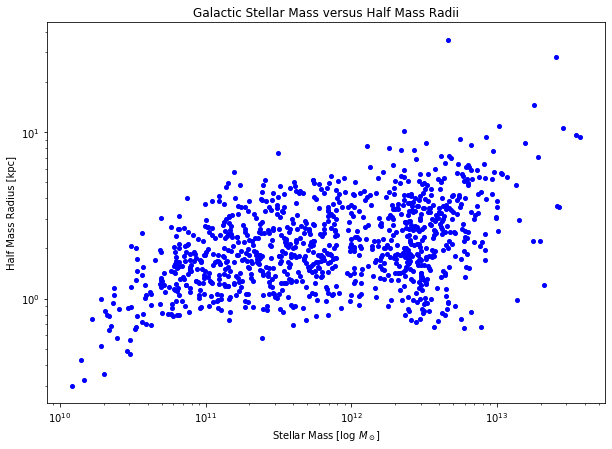

In [14]:
#ids = [ subhalos['results'][i]['id'] for i in range(subhalos['count']) ]

#generating the plot
plt.figure(figsize=(10,7)) # 10 is width, 7 is height

for id in ids[:1000]:
    #Z=2#
    url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
    subhalo = get(url)
    #print(id, subhalo['mass'], subhalo['halfmassrad_stars'])
    #y-axis: (.704 * (subhalo['halfmassrad_stars'])) kpc
    plt.plot((subhalo['mass'] * mass_unit), (subhalo['halfmassrad_stars'] * length_unit), 'bo', ms=4)
    #I'm not entirely sure if subhalo['mass'] is the right call.

plt.xscale('log')
plt.yscale('log')
plt.title('Galactic Stellar Mass versus Half Mass Radii')
plt.xlabel('Stellar Mass [log $M_\odot$]')
plt.ylabel('Half Mass Radius [kpc]')
#still unsure why masses over 10**12 show up. I've tried an alternative plot below.

Text(0, 0.5, 'Half Mass Radius [kpc]')

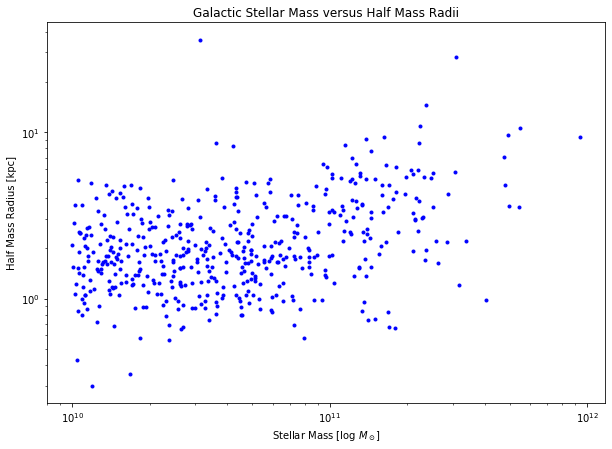

In [21]:
#generating the plot
plt.figure(figsize=(10,7)) # 10 is width, 7 is height

for id in ids[:500]: 
    #Z=2#
    url = "http://www.tng-project.org/api/TNG100-1/snapshots/z=" + str(redshift) + "/subhalos/" + str(id)
    subhalo = get(url)
    #print(id, subhalo['mass'], subhalo['halfmassrad_stars'])
    #y-axis: (.704 * (subhalo['halfmassrad_stars'])) kpc
    plt.plot((subhalo['mass_stars'] * mass_unit), (subhalo['halfmassrad_stars'] * length_unit), 'bo', ms=3)
    #So here is a smaller plot of subhalo['mass_stars']
    #in case this is actually what we're looking for?

plt.xscale('log')
plt.yscale('log')
plt.title('Galactic Stellar Mass versus Half Mass Radii')
plt.xlabel('Stellar Mass [log $M_\odot$]')
plt.ylabel('Half Mass Radius [kpc]')
#I remember that concerns were raised about why masses over 10**12 were included in the plot. 
#This might be why. But I got timeout error messages. Worked well for fewer ids.